<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_GENAP_2023/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import Library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

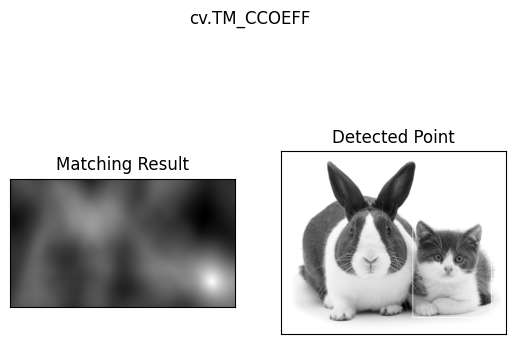

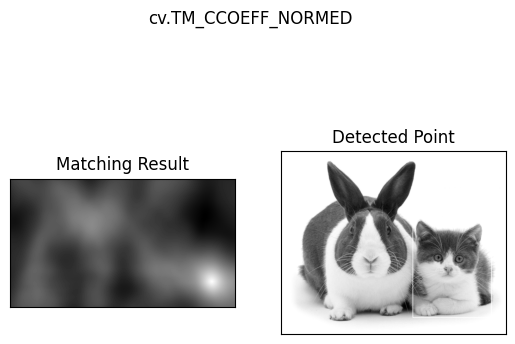

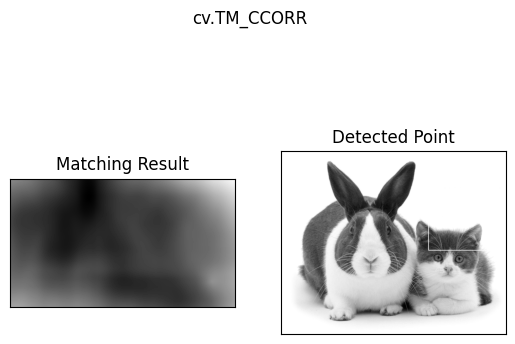

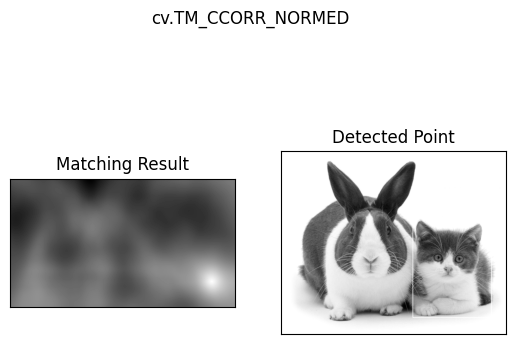

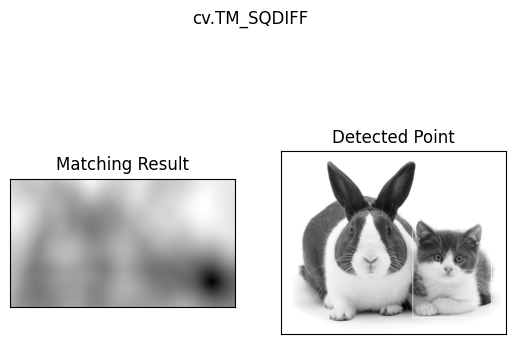

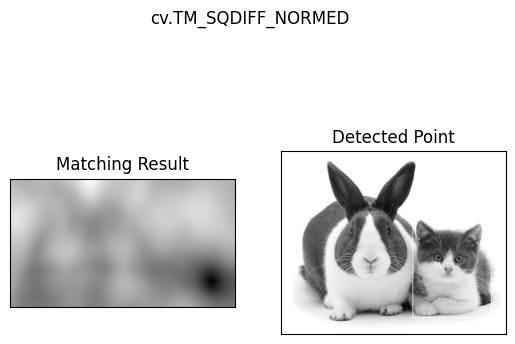

In [20]:
#2. Implementasi 6 Metode Template Matching 

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/cats_and_bunnies.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

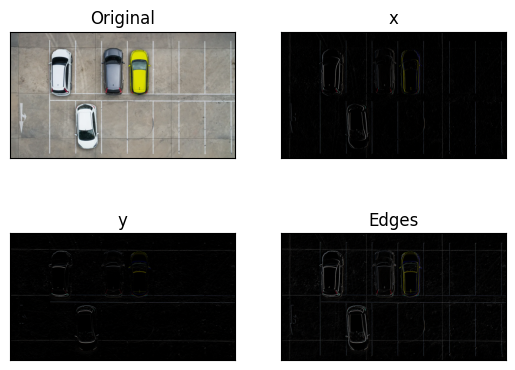

In [21]:
# 4.1  Implementasi Sobel Edge Detection

# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt

# Membaca Image
imgpath = "/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/car-park.jpg"
img = cv2.imread(imgpath, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mencari edge dengan edgesx dan edgesy 
edgesx = cv2.Sobel(img, -1, dx=1, dy=0, ksize=1)
edgesy = cv2.Sobel(img, -1, dx=0, dy=1, ksize=1)

edges = edgesx + edgesy

output = [img, edgesx, edgesy, edges]
titles = ['Original', 'x', 'y', 'Edges']

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

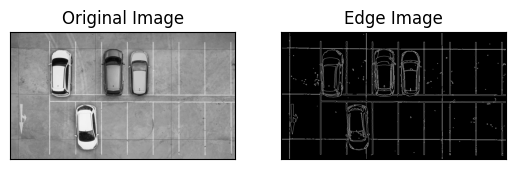

In [22]:
# 4.2 Implementasi Canny Edge Detection

# Import Library
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Baca Image
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/car-park.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

# Pemrosesan Image
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# Render Image
plt.show()

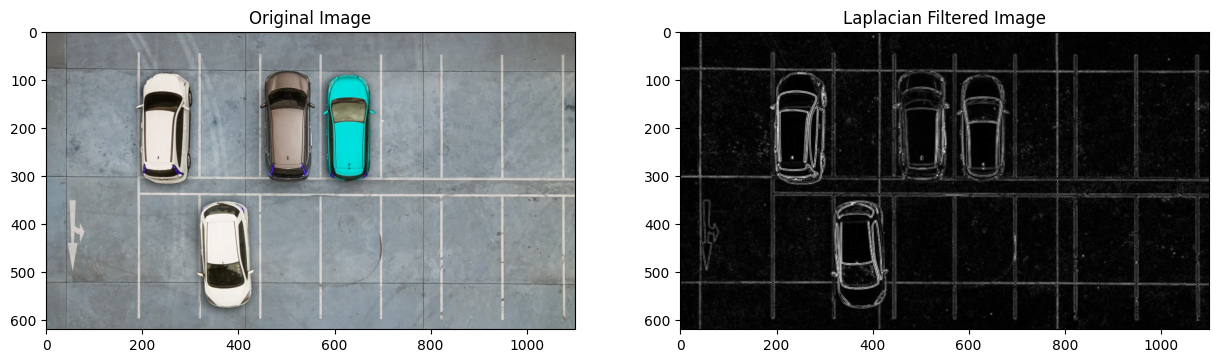

In [23]:
# 4.3 Implementasi Laplacian Edge Detection

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_original = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/car-park.jpg', cv2.IMREAD_COLOR)

# Menghilangkan Noise
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Mengurangi Noise Pada Image
img = cv2.GaussianBlur(image_gray,(3,3),0)

# Filter Image dengan Filter 2D
filtered_image = cv2.Laplacian(img, ksize=3, ddepth=cv2.CV_16S)

# Rubah Kembali ke Uint8
filtered_image = cv2.convertScaleAbs(filtered_image)

# Hasil Proses
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

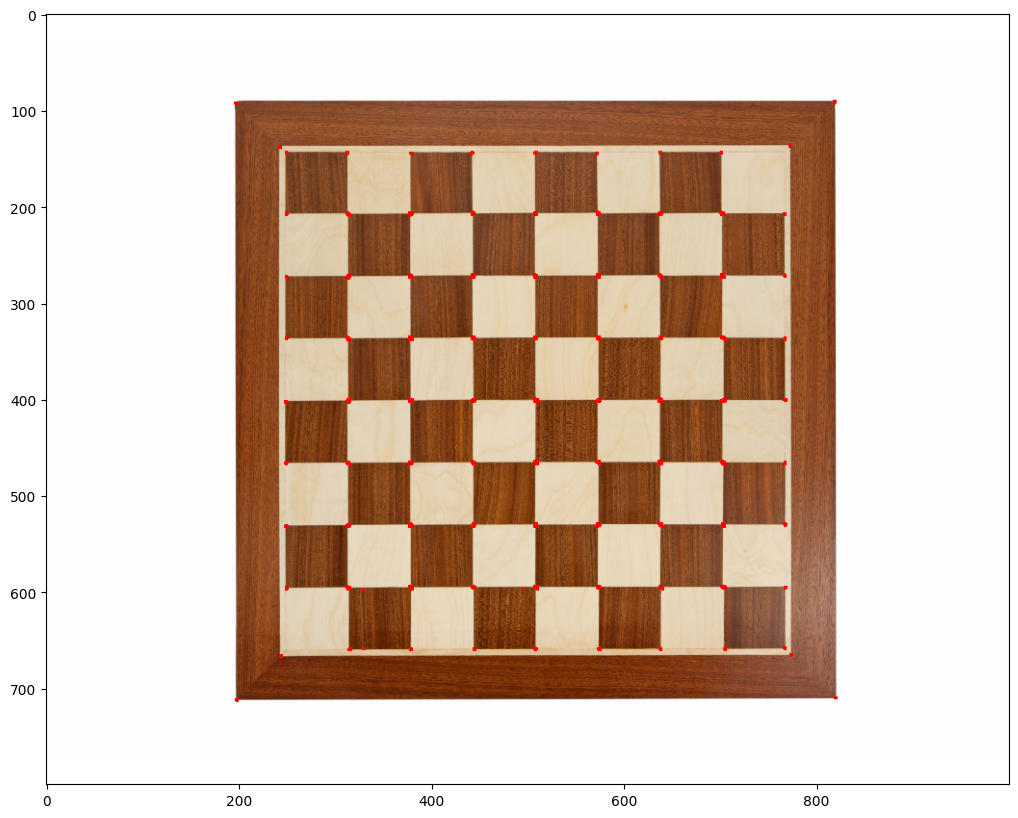

In [67]:
# 5.1 Implementasi  Harris Corner Detection

filename = '/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/chess-board.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

# Hasil Dilebarkan Untuk menandai Sudut, Tidak Terlalu Penting
dst = cv.dilate(dst,None)

# Threshold untuk nilai optimal, dapat bervariasi, tergantung pada gambarnya.
img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

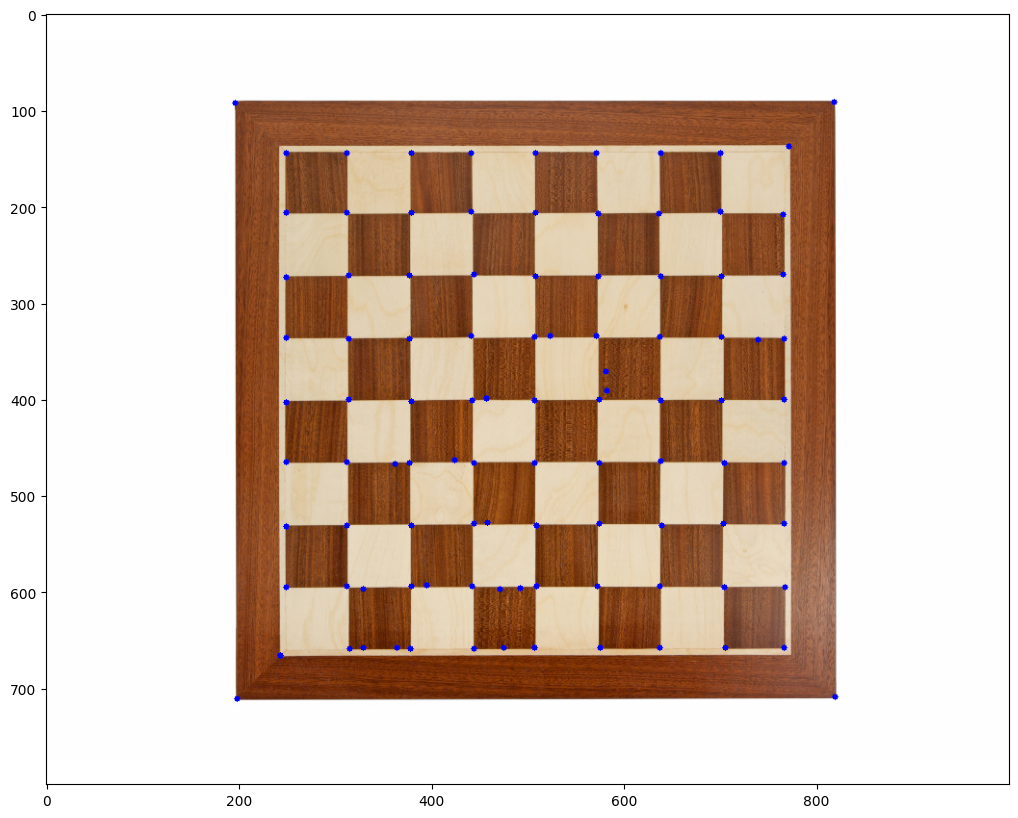

In [68]:
# 5.2 Implementasi Shi-Tomasi Detection
    
# organizing imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# path to input image specified and  
# image is loaded with imread command
img = cv2.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/chess-board.jpg')
  
# convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Shi-Tomasi corner detection function
# We are detecting only 100 best corners here
# You can change the number to get desired result.
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
  
# convert corners values to integer
# So that we will be able to draw circles on them
corners = np.int0(corners)
  
# draw red color circles on all corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
  
# resulting image
plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  
# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

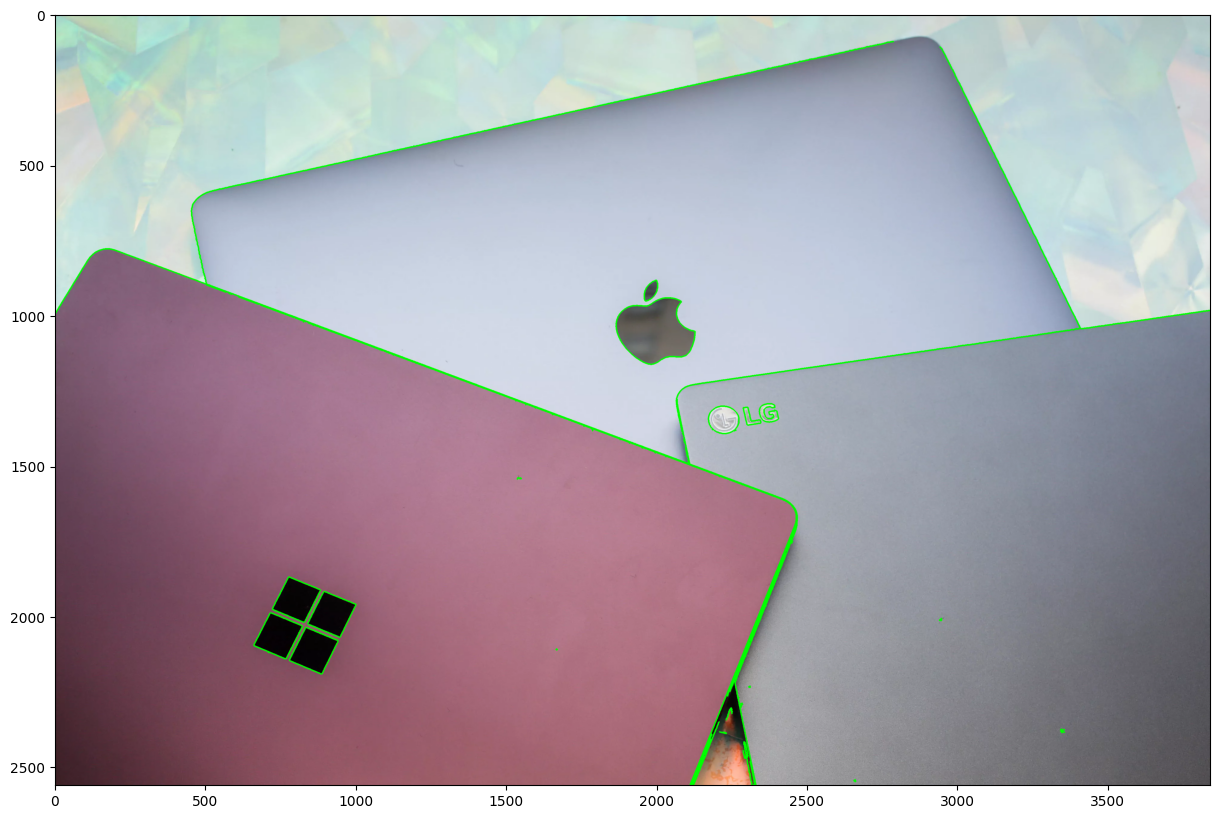

In [75]:
#7. Implementasi findContours openCV

import cv2
import numpy as np

# Let's load a simple image with 3 black squares
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK Tugas/Week 11/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)


plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
